## Importing libraries

In [67]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Statistics
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from numpy import sqrt

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

pd.set_option('display.max_columns', None)

In [139]:
# Data Loading

train = pd.read_csv('C:/Users/admin/Desktop/data/Data Sets/Credit card cunsumption/train.csv')
test = pd.read_csv('C:/Users/admin/Desktop/data/Data Sets/Credit card cunsumption/test.csv')

In [3]:
# Display train dataset

train.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47.0,430000.0,1.0,1.0,1.0,1.0,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,191777.13,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31.0,127500.0,1.0,1.0,1.0,1.0,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,4.0,1.0,80.0,199999.0,1.0,1.0,1.0,1.0,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,1.0,1.0,10.0,155000.0,1.0,1.0,1.0,1.0,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,54.0,16.0,68.0,297000.0,1.0,1.0,1.0,1.0,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36.0,19613.0,153253.71,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


In [4]:
# train dataset shape

train.shape

(15000, 44)

In [5]:
# display test dataset

test.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,575,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10.0,4.0,47.0,56.0,6.0,125000.0,1.0,1.0,1.0,1.0,13.80,376600.50,1633.0,-5715.49023,27646.84,44341.00,16.0,36.0,24485.0,23512.67,41755.0,24.0,20.0,9750.0,30527.88,31271.00,3.0,12.0,25945.92,Y,1170.49
1,13541,current,M,33,394,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10.0,4.0,50.0,38.0,31.0,59000.0,1.0,1.0,1.0,1.0,101891.25,470000.00,891.0,35346.00000,32247.25,21946.00,42.0,5.0,3375.0,15049.44,130299.0,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,Y,16447.45
2,13431,current,M,53,324,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30.0,5.0,24.0,27.0,2.0,49999.0,1.0,1.0,1.0,1.0,53374.97,674291.83,54101.0,2557.00000,63169.00,36616.50,41.0,6.0,14950.0,133659.00,40422.0,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,Y,2622.28
3,8687,current,M,33,370,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99.0,71.0,5.0,1.0,11.0,520000.0,1.0,1.0,1.0,1.0,9118.35,470000.00,5905.0,5464.00000,39442.80,43173.38,46.0,1.0,235844.0,99686.03,48148.0,3.0,5.0,97825.0,93572.42,109429.75,21.0,0.0,72317.00,Y,340.79
4,14727,current,M,62,505,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10.0,47.0,5.0,25.0,1.0,152000.0,1.0,1.0,1.0,1.0,12850544.36,101.24,130000.0,1332.00000,8937.00,15232.00,11.0,1.0,14495.0,190374.25,25926.0,70.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,Y,2812.20


In [6]:
# test dataset shape

test.shape

(5000, 43)

In [7]:
# Copy test dataset ID

test_id = test['ID'].values

In [8]:
# droping train dataset ID and test dataset ID which is unnecessory in model training

train.drop(['ID'], 1, inplace = True)
test.drop(['ID'], 1, inplace = True)

## EDA on train dataset


In [9]:
# check data types of train dataset columns

train.dtypes

account_type              object
gender                    object
age                        int64
region_code                int64
cc_cons_apr              float64
dc_cons_apr              float64
cc_cons_may              float64
dc_cons_may              float64
cc_cons_jun              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may             float64
cc_count_jun             float64
dc_count_apr             float64
dc_count_may             float64
dc_count_jun             float64
card_lim                 float64
personal_loan_active     float64
vehicle_loan_active      float64
personal_loan_closed     float64
vehicle_loan_closed      float64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr          float64
credit_count_apr         float64
max_credit_amount_apr    float64
debit_amou

In [10]:
# Describe train dataset with statistics

train.describe()

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.0,15000.0,15000.0,15000.0,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000
mean,47.790600,598.415467,17957.391719,8171.098287,1.633705e+04,7703.605203,12129.010832,7097.395321,41.488333,33.490200,41.507000,17.171000,13.979733,30.287267,277005.147400,1.0,1.0,1.0,1.0,6.194140e+05,2.333642e+05,44440.348527,3523.049025,6.823421e+04,8.079761e+04,36.400267,11.291400,5.438954e+04,6.554492e+04,8.356935e+04,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576040e+04,55157.729867
std,30.632766,220.062345,25187.939958,14773.029481,2.706085e+04,18987.296785,18488.781136,13251.695907,97.432251,49.540999,47.342918,19.359678,17.087203,29.252490,179429.540139,0.0,0.0,0.0,0.0,3.087815e+06,4.073237e+05,88113.186017,7373.355434,1.126786e+05,1.989060e+05,30.700996,12.670785,1.950943e+05,1.016829e+05,1.776300e+05,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179153e+05,97670.972252
min,25.000000,123.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,3.000000e-01,3.000000e+00,462.000000,-12179.000000,4.010000e+00,6.138000e+01,0.000000,0.000000,1.000000e+00,2.820000e+01,1.061000e+01,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,33.000000,424.000000,4411.027500,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.750000,5.000000,8.000000,10.000000,2.000000,2.000000,4.000000,124000.000000,1.0,1.0,1.0,1.0,6.100000e+03,3.817300e+04,2214.000000,0.000000,2.323043e+04,2.684600e+04,11.000000,2.000000,2.068300e+04,2.100333e+04,2.541027e+04,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.548510e+03,6768.000000
50%,40.000000,623.000000,10288.100000,3996.900000,8.695030e+03,3820.500000,6655.250000,3327.000000,10.000000,23.000000,35.000000,7.000000,5.000000,17.000000,272000.000000,1.0,1.0,1.0,1.0,4.503600e+04,1.110000e+05,13873.000000,2351.000000,4.187560e+04,4.709700e+04,32.000000,5.000000,3.191500e+04,3.823568e+04,4.814000e+04,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.954430e+03,13364.000000
75%,53.000000,799.000000,21405.000000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,43.000000,61.000000,25.000000,21.000000,54.000000,400000.000000,1.0,1.0,1.0,1.0,1.617040e+05,2.450000e+05,48950.000000,6885.000000,7.536829e+04,8.593500e+04,52.000000,19.000000,5.255900e+04,7.440055e+04,9.456936e+04,11.000000,69.000000,5.598600e+04,8.461910e+04,8.559233e+04,21.000000,73.000000,5.321100e+04,9.376390e+03,20105.750000
max,223.000000,974.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,601.000000,653.000000,82.000000,71.000000,98.000000,1000000.000000,1.0,1.0,1.0,1.0,6.597743e+07,5.000000e+06,610000.000000,35346.000000,5.156864e+06,1.059212e+0

In [11]:
# Print skewness ans kurtosis for the target variable('cc_cons')

print('Skewness of cc_cons is: {} '.format(train['cc_cons'].skew()))
print('Kurtosis of cc_cons is: {} '.format(train['cc_cons'].kurt()))

Skewness of cc_cons is: 2.126581960835585 
Kurtosis of cc_cons is: 3.2629409344043707 


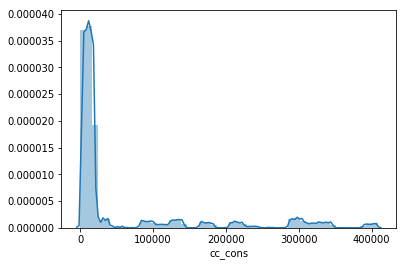

In [12]:
# Ploting distribution of target variable('cc_cons')

sns.distplot(train['cc_cons'])

We can see the frequency distribution of the target variable is very skewed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015324B680B8>,
      dtype=object)

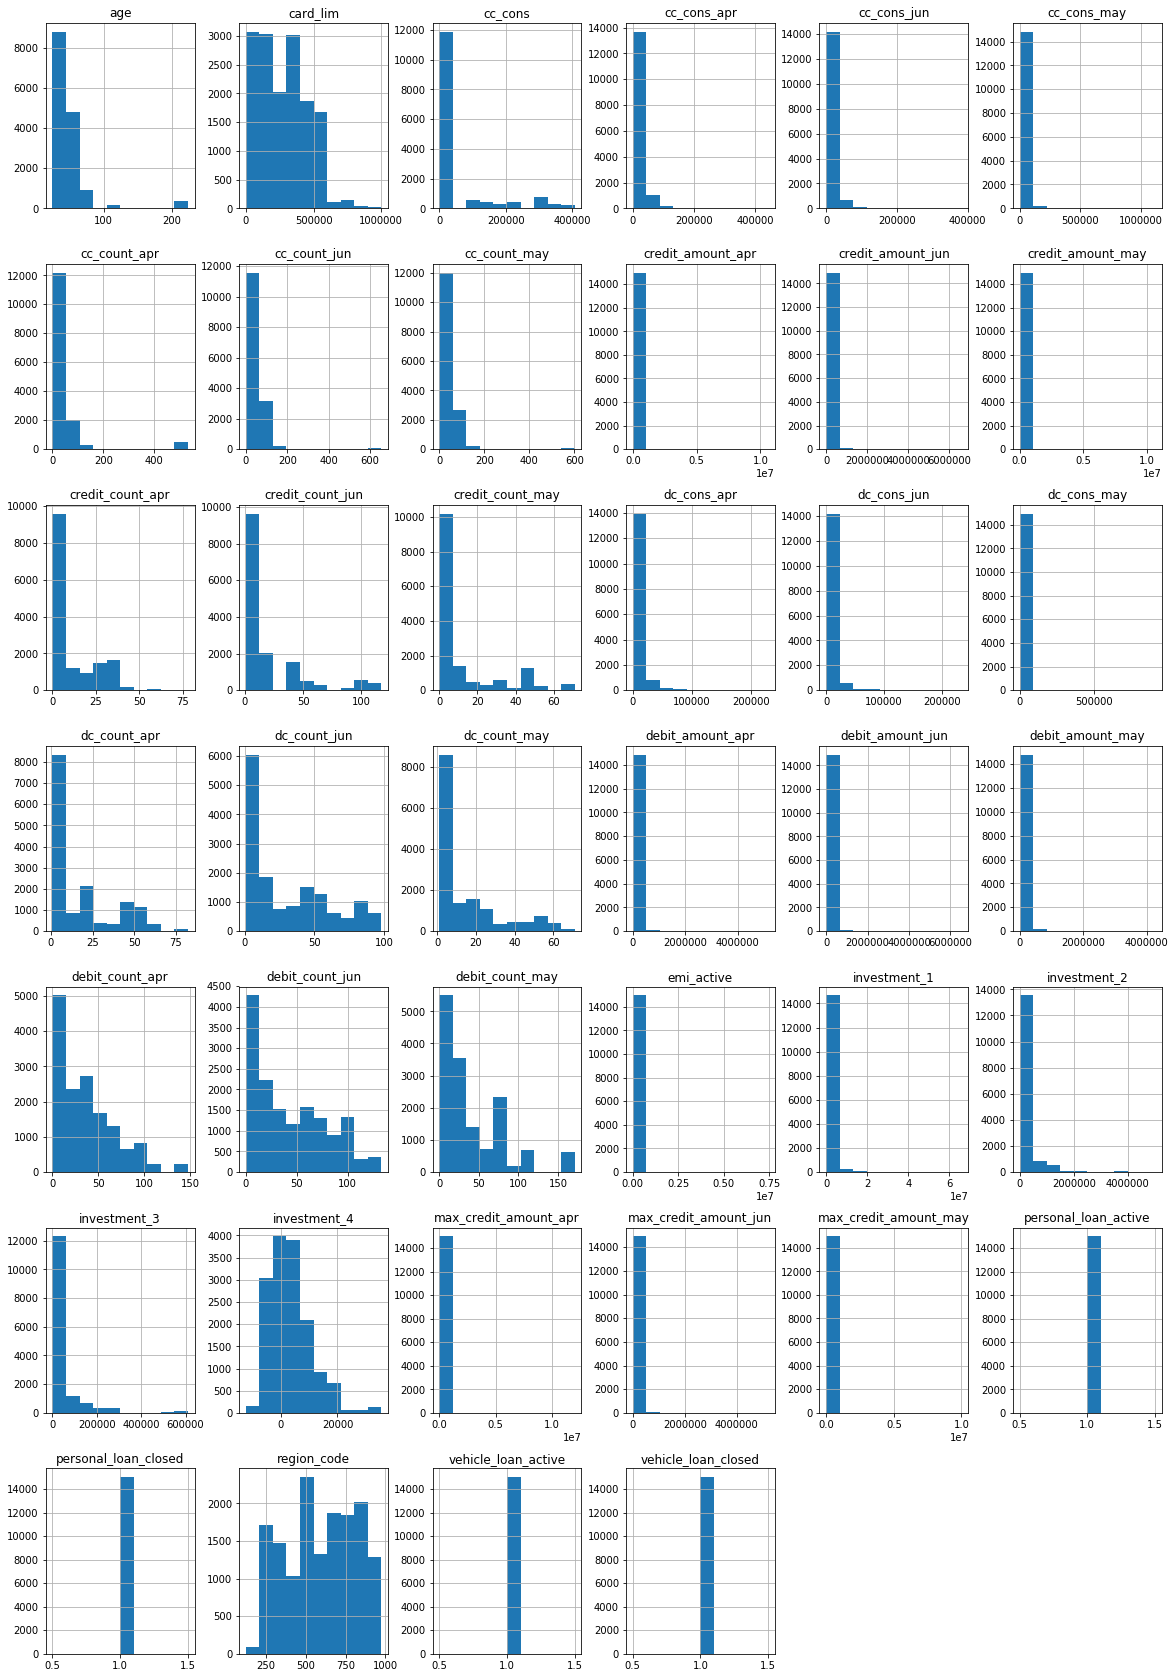

In [13]:
#Plot Histogram of the numeric train dataset columns 

train.hist(figsize = (20, 30))

We have oberbed with the hsitogram plot that there are some extreme values(outliers), in some variables. Lets plot boxplot for that variables

### Ploting box plot for the train dataset columns to see the outliers clearly and treat them

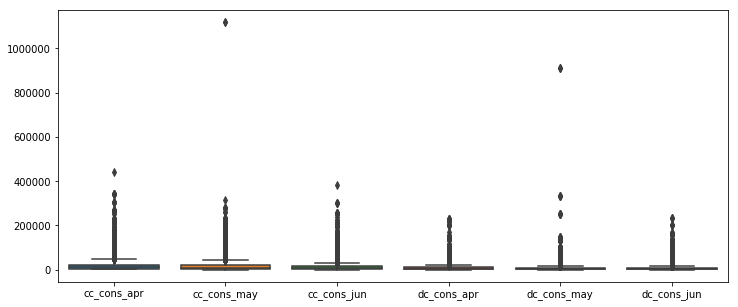

In [14]:
cc_dc_cons_var = train[['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun','dc_cons_apr', 'dc_cons_may', 'dc_cons_jun']]

plt.figure(figsize = (12, 5))
sns.boxplot(data = cc_dc_cons_var)

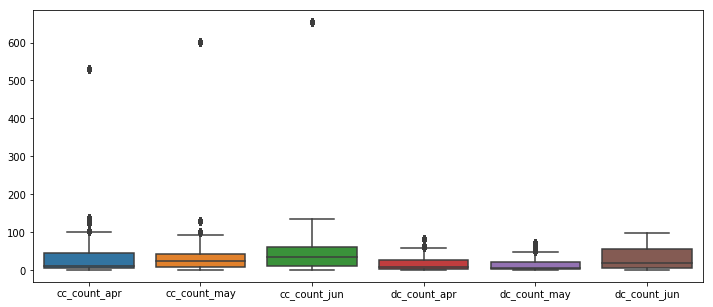

In [15]:
outl_cc_dc_count = train[['cc_count_apr','cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may','dc_count_jun']]

plt.figure(figsize = (12, 5))
sns.boxplot(data = outl_cc_dc_count)

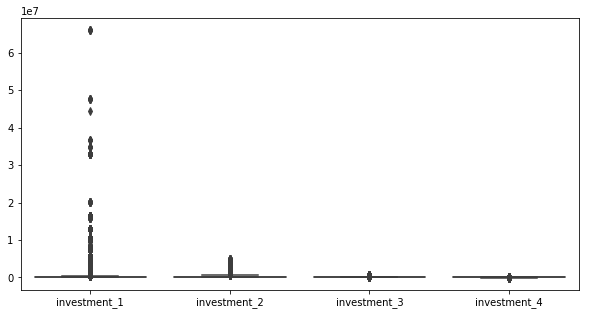

In [16]:
outl_invesment = train[['investment_1', 'investment_2', 'investment_3', 'investment_4']]

plt.figure(figsize = (10, 5))
sns.boxplot(data = outl_invesment)

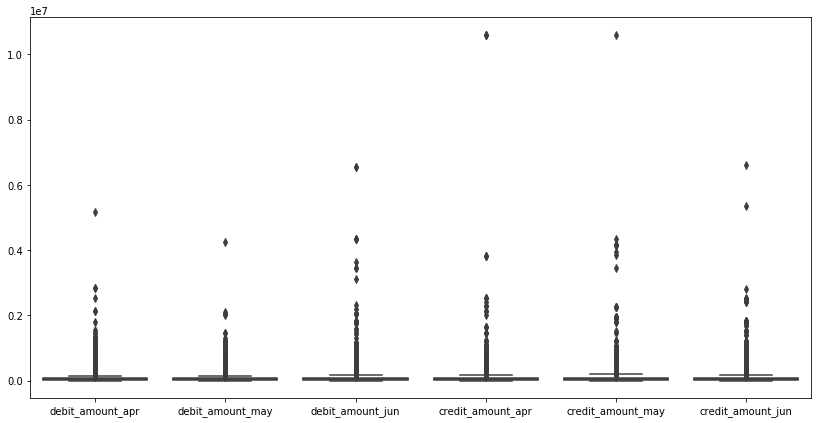

In [17]:
outl_debit_credit_amt = train[['debit_amount_apr', 'debit_amount_may','debit_amount_jun', 'credit_amount_apr', 'credit_amount_may','credit_amount_jun']]

plt.figure(figsize = (14, 7))
sns.boxplot(data = outl_debit_credit_amt)

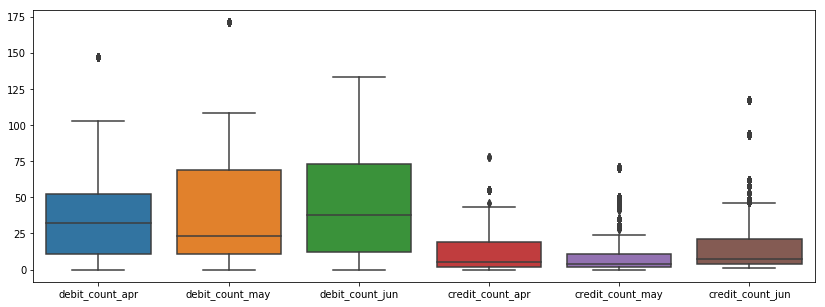

In [18]:
outl_debit_credit_count = train[['debit_count_apr', 'debit_count_may', 'debit_count_jun', 'credit_count_apr', 'credit_count_may', 'credit_count_jun']]

plt.figure(figsize = (14, 5))
sns.boxplot(data = outl_debit_credit_count)

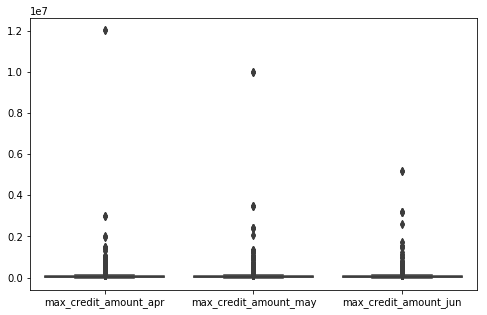

In [19]:
outl_max_cred_amnt = train[['max_credit_amount_apr', 'max_credit_amount_may', 'max_credit_amount_jun']]

plt.figure(figsize = (8, 5))
sns.boxplot(data = outl_max_cred_amnt)

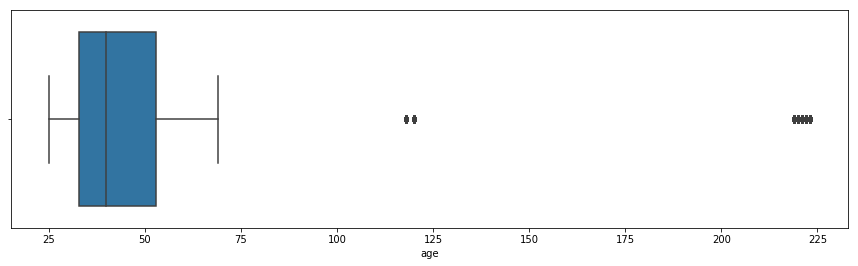

In [20]:
plt.figure(figsize = (15, 4))

sns.boxplot(train['age'])

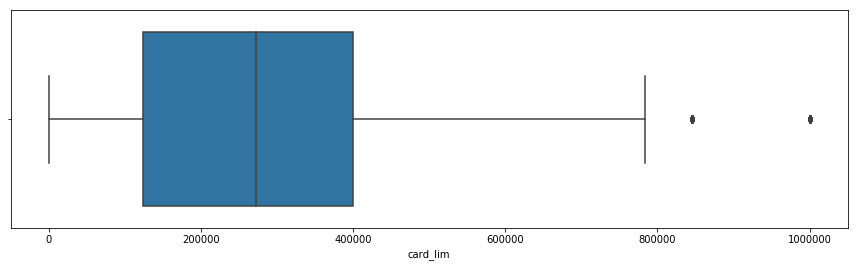

In [21]:
plt.figure(figsize = (15, 4))

sns.boxplot(train['card_lim'])

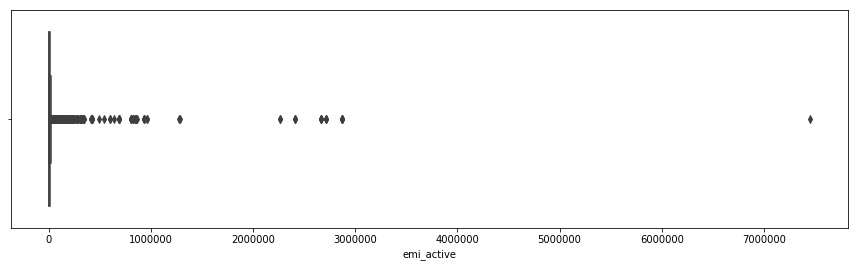

In [22]:
plt.figure(figsize = (15, 4))

sns.boxplot(train['emi_active'])

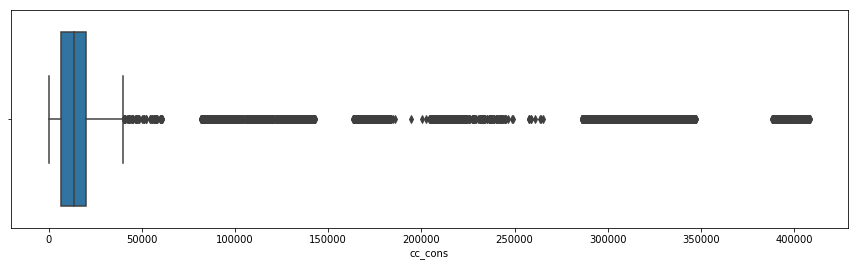

In [23]:
plt.figure(figsize = (15, 4))

sns.boxplot(train['cc_cons'])

In [24]:
#storing the numerical and categorical columns seperately of the train dataset

num_var = train.select_dtypes(include = 'number')
cat_var = train.select_dtypes(include = 'object')

In [25]:
# Print numerical and categorical columns

print('These are the numerical columns:')
print('\n', num_var.columns)
print(len(num_var.columns))
print()
print('These are the categorical columns: ')
print('\n', cat_var.columns)

These are the numerical columns:

 Index(['age', 'region_code', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'emi_active', 'cc_cons'],
      dtype='object')
40

These are the categorical columns: 

 Index(['account_type', 'gender', 'loan_enq'], dtype='object')


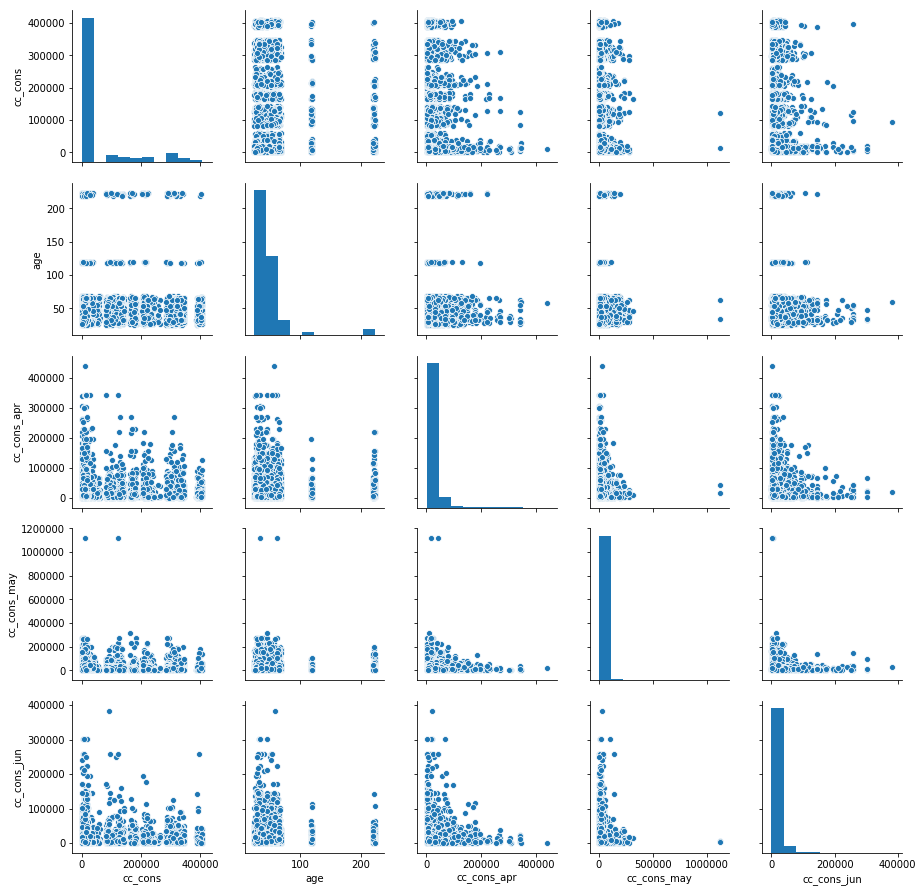

In [26]:
# Ploting the pairplot for all the numerical variables with respect to target variable('cc_cons')

sns.pairplot(num_var[['cc_cons', 'age', 'cc_cons_apr', 'cc_cons_may', 'cc_cons_jun']])

### Ploting countplot for the categorical columns of train dataset

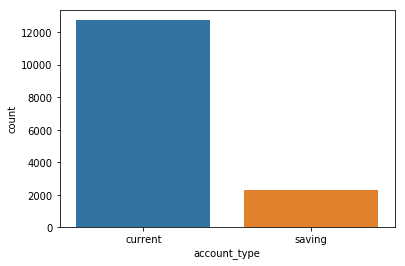

In [27]:
# Plot the count plot for the categorical variables

sns.countplot(x = 'account_type', data = cat_var)

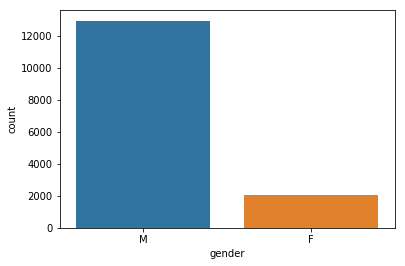

In [28]:
sns.countplot(x = 'gender', data = train)

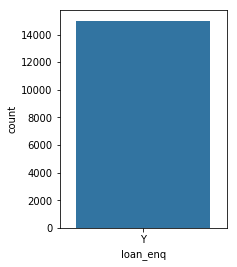

In [29]:
plt.figure(figsize = (3, 4))

sns.countplot(x = 'loan_enq', data = train)

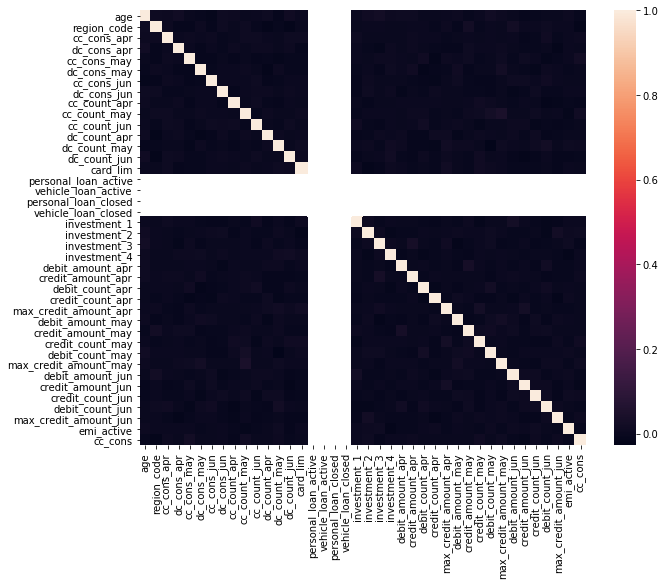

In [30]:
# Ploting heatmap for the numerical columns of train dataset to check the correlation between numerical columns of train dataset

corr = num_var.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr)

#### By depicted heatmap we can observe that some columns(personal_loan_active, vehicle_loan_active, personal_loan_closed, vehicle_loan_closed) are highly corelated with each other that will affect the performance of the model. Lets remove these columns

In [124]:
test.shape

(5000, 42)

In [145]:
# Removing highly corelated column

train.drop(['region_code', 'loan_enq', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed'], 1, inplace = True)
test.drop(['region_code', 'loan_enq', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed'], 1, inplace = True)

## Preprocessing

#### As we have seen earlier the distribution of the target value of the train dataset is highly skewed. Lets take the log for that column to make it normal distribute.

In [32]:
# Taking log for cc_cons(target variable) variable of the train dataset 

train['cc_cons'] = train['cc_cons'].apply(lambda x: np.log(x+1))

In [33]:
# Print skewness ans kurtosis for the target variable('cc_cons') after taking log

print('Skewness of cc_cons is: {} '.format(train['cc_cons'].skew()))
print('Kurtosis of cc_cons is: {} '.format(train['cc_cons'].kurt()))

Skewness of cc_cons is: 0.09391470433219626 
Kurtosis of cc_cons is: 0.6349588641161339 


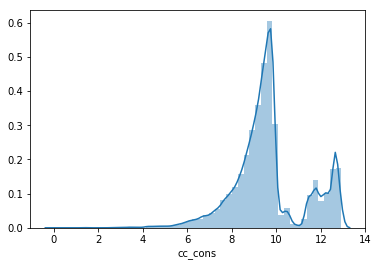

In [34]:
# Ploting distribution of target variable('cc_cons') after taking log

sns.distplot(train['cc_cons'])

now the distribution of cc_cons is much better for futher process

In [35]:
# train[train['emi_active'] > 2000000]

In [36]:
# train[train['emi_active'] > 100000].count()

In [37]:
# train.drop(train[train['emi_active'] >= 2000000].index, inplace = True)

In [38]:
# train['emi_active'] = train['emi_active'].mask(train['emi_active'] >= 100000, train['emi_active'].mean())

In [39]:
# print(train['emi_active'].mean())
# print(train['emi_active'].median())
# print(train['emi_active'].mode())

In [40]:
# print(train['cc_cons'].min())
# print(train['cc_cons'].max())

In [41]:
# train['card_lim'].value_counts()

In [42]:
# Treating with outliers of 'cc_cons_apr', 'cc_cons_may', 'cc_cons_jun','dc_cons_apr', 'dc_cons_may', 'dc_cons_jun' columns

train.drop(train[train['cc_cons_apr'] >= 400000].index, inplace = True)
train.drop(train[train['cc_cons_may'] >= 400000].index, inplace = True)
train.drop(train[train['cc_cons_jun'] >= 400000].index, inplace = True)
train.drop(train[train['dc_cons_apr'] >= 400000].index, inplace = True)
train.drop(train[train['dc_cons_may'] >= 400000].index, inplace = True)
train.drop(train[train['dc_cons_jun'] >= 400000].index, inplace = True)

In [43]:
# Treating with outliers of 'cc_count_apr','cc_count_may', 'cc_count_jun' columns

train['cc_count_apr'] = train['cc_count_apr'].mask(train['cc_count_apr'] >= 400, train['cc_count_apr'].median())
train['cc_count_may'] = train['cc_count_may'].mask(train['cc_count_may'] >= 400, train['cc_count_may'].median())
train['cc_count_jun'] = train['cc_count_jun'].mask(train['cc_count_jun'] >= 400, train['cc_count_jun'].median())

In [44]:
# Treating with outliers of 'investment_1', 'investment_2' 'investment_4' columns

train.drop(train[train['investment_1'] >= 40000000].index, inplace = True)
train['investment_1'] = train['investment_1'].mask(train['investment_1'] >= 1000000, train['investment_1'].mean())
train['investment_2'] = train['investment_2'].mask(train['investment_2'] >= 1000000, train['investment_2'].mean())
train['investment_4'] = train['investment_4'].abs()

In [45]:
# Treating with outliers of 'debit_amount_apr', 'debit_amount_may','debit_amount_jun', 'credit_amount_apr', 'credit_amount_may','credit_amount_jun' columns

train.drop(train[train['credit_amount_apr'] >= 10000000].index, inplace = True)
train.drop(train[train['credit_amount_may'] >= 10000000].index, inplace = True)
train.drop(train[train['credit_amount_jun'] >= 5000000].index, inplace = True)
train.drop(train[train['debit_amount_apr'] >= 5000000].index, inplace = True)
train.drop(train[train['debit_amount_jun'] >= 5000000].index, inplace = True)
train['debit_amount_jun'] = train['debit_amount_jun'].mask(train['debit_amount_jun'] >= 3000000, train['debit_amount_jun'].mean())
train['credit_amount_may'] = train['credit_amount_may'].mask(train['credit_amount_may'] >= 3000000, train['credit_amount_may'].mean())
train['credit_amount_apr'] = train['credit_amount_apr'].mask(train['credit_amount_apr'] >= 3000000, train['credit_amount_apr'].mean())
train['debit_amount_may'] = train['debit_amount_may'].mask(train['debit_amount_may'] >= 3000000, train['debit_amount_may'].mean())

In [46]:
# Treating with outliers of 'debit_count_apr', 'debit_count_may', 'credit_count_jun' columns

train['debit_count_apr'] = train['debit_count_apr'].mask(train['debit_count_apr'] >= 140, train['debit_count_apr'].median())
train['debit_count_may'] = train['debit_count_may'].mask(train['debit_count_may'] >= 150, train['debit_count_may'].median())
train['credit_count_jun'] = train['credit_count_jun'].mask(train['credit_count_jun'] >= 100, train['credit_count_jun'].median())

In [47]:
# Treating with outliers of 'max_credit_amount_apr', 'max_credit_amount_may', 'max_credit_amount_jun' columns

train.drop(train[train['max_credit_amount_apr'] >= 10000000].index, inplace = True)
train.drop(train[train['max_credit_amount_may'] >= 8000000].index, inplace = True)
train.drop(train[train['max_credit_amount_jun'] >= 5000000].index, inplace = True)
train.drop(train[train['max_credit_amount_apr'] >= 2500000].index, inplace = True)
train.drop(train[train['max_credit_amount_may'] >= 2500000].index, inplace = True)
train.drop(train[train['max_credit_amount_jun'] >= 2500000].index, inplace = True)

In [48]:
# Treating with outliers of age column

train['age'] = train['age'].mask(train['age'] >= 100, train['age'].median())

In [49]:
# Treating with outliers of card_lim column

train['card_lim'] = train['card_lim'].mask(train['card_lim'] >= 800000, train['card_lim'].mean())

In [50]:
# Treating with outliers of emi_active column

train.drop(train[train['emi_active'] >= 7000000].index, inplace = True)
train.drop(train[train['emi_active'] >= 2000000].index, inplace = True)
train['emi_active'] = train['emi_active'].mask(train['emi_active'] >= 100000, train['emi_active'].mean())

#### Numerically encode categorical features because most models can only handle numerical features.

In [146]:
train = pd.get_dummies(train, columns = ['account_type', 'gender'])
test =  pd.get_dummies(test, columns = ['account_type', 'gender'])

In [128]:
test.shape

(5000, 36)

In [129]:
test.head()

,account_type,gender,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,current,M,37,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10.0,4.0,47.0,56.0,6.0,125000.0,13.80,376600.50,1633.0,-5715.49023,27646.84,44341.00,16.0,36.0,24485.0,23512.67,41755.0,24.0,20.0,9750.0,30527.88,31271.00,3.0,12.0,25945.92,1170.49
1,current,M,33,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10.0,4.0,50.0,38.0,31.0,59000.0,101891.25,470000.00,891.0,35346.00000,32247.25,21946.00,42.0,5.0,3375.0,15049.44,130299.0,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,16447.45
2,current,M,53,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30.0,5.0,24.0,27.0,2.0,49999.0,53374.97,674291.83,54101.0,2557.00000,63169.00,36616.50,41.0,6.0,14950.0,133659.00,40422.0,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,2622.28
3,current,M,33,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99.0,71.0,5.0,1.0,11.0,520000.0,9118.35,470000.00,5905.0,5464.00000,39442.80,43173.38,46.0,1.0,235844.0,99686.03,48148.0,3.0,5.0,97825.0,93572.42,109429.75,21.0,0.0,72317.00,340.79
4,current,M,62,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10.0,47.0,5.0,25.0,1.0,152000.0,12850544.36,101.24,130000.0,1332.00000,8937.00,15232.00,11.0,1.0,14495.0,190374.25,25926.0,70.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,2812.20


### Train & Fit models

In [57]:
X = train.drop(['cc_cons'], 1)
y = train['cc_cons']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11190, 38), (3731, 38), (11190,), (3731,))

In [60]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p- r)**2
    return (sum/len(predicted_column))**0.5

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
liear_reg = LinearRegression()
score_liear_reg=cross_val_score(liear_reg, X, y, cv=10)
score_liear_reg.mean()

-0.0020173203705546984

In [63]:
liear_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
liear_reg.score(X, y)

0.002970696703883946

In [68]:
y_pred_liear_reg = liear_reg.predict(X)

In [69]:
print(mean_absolute_error(y, y_pred_liear_reg))
print(mean_squared_error(y, y_pred_liear_reg))
print(sqrt(mean_squared_error(y, y_pred_liear_reg)))

1.1572660540692659
2.5870049998723497
1.6084169235221164


In [70]:
rmsle(y, y_pred_liear_reg)

0.15817984955037062

In [71]:
# knn_scores = []
# for k in range(1,21):
#     knn_reg = KNeighborsRegressor(n_neighbors = k)
#     score=cross_val_score(knn_reg,X,y,cv=10)
#     knn_scores.append(score.mean())
# knn_scores

In [72]:
# plt.figure(figsize = (15, 5))
# plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
# for i in range(1,21):
#     plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
# plt.xticks([i for i in range(1, 21)])
# plt.xlabel('Number of Neighbors (K)')
# plt.ylabel('Scores')
# plt.title('K Neighbors Classifier scores for different K values')

In [73]:
knn_reg = KNeighborsRegressor(n_neighbors = 2)
score_knn_reg=cross_val_score(knn_reg, X, y, cv=10)
score_knn_reg.mean()

-0.49985526272756003

In [74]:
knn_reg.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [75]:
y_pred_knn_reg = knn_reg.predict(X)

In [76]:
print(mean_absolute_error(y, y_pred_knn_reg))
print(mean_squared_error(y, y_pred_knn_reg))
print(sqrt(mean_squared_error(y, y_pred_knn_reg)))

0.860117394499361
1.27940219363476
1.1311066234598575


In [77]:
rmsle(y, y_pred_knn_reg)

0.11182212493045199

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
d_tree = DecisionTreeRegressor(random_state=0)
score_d_tree=cross_val_score(d_tree, X, y, cv=10)
print(score_d_tree.mean())

-1.158470085798753


In [80]:
d_tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [81]:
d_tree.score(X, y)

0.9999999999141533

In [82]:
y_pred_d_tree = d_tree.predict(X)

In [83]:
print(mean_absolute_error(y, y_pred_d_tree))
print(mean_squared_error(y, y_pred_d_tree))
print(sqrt(mean_squared_error(y, y_pred_d_tree)))

9.886069076514464e-07
2.2274730087170942e-10
1.4924721132125365e-05


In [84]:
rmsle(y, y_pred_d_tree)

1.3265412055018827e-06

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
# rfr = RandomForestRegressor(n_estimators = 10, n_jobs = 100, min_samples_leaf = 100, random_state = 0)
rfr = RandomForestRegressor(random_state = 0)
score_rfr=cross_val_score(rfr,X,y,cv=10)
print(score_rfr.mean())

-0.11605303275811751


In [87]:
rfr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [88]:
rfr.score(X, y)

0.7970849308643186

In [89]:
y_pred_rfr = rfr.predict(X)

In [90]:
print(mean_absolute_error(y, y_pred_rfr))
print(mean_squared_error(y, y_pred_rfr))
print(sqrt(mean_squared_error(y, y_pred_rfr)))

0.525036424223106
0.526506389198417
0.7256076000142343


In [91]:
rmsle(y, y_pred_rfr)

0.07393533304019798

In [92]:
from xgboost import XGBRegressor
parameters={'learning_rate':[0.1,0.15,0.2,0.25,0.3],
            'max_depth':range(1,3)}

In [93]:
xgb = XGBRegressor(random_state = 0)
score_xgb=cross_val_score(xgb,X,y,cv=10)
print(score_rfr.mean())

[14:29:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:29:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:29:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:29:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:29:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:29:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:29:40] WARNI

In [94]:
xgb.fit(X, y)

[14:29:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [95]:
xgb.score(X, y)

0.05472703662496114

In [96]:
y_pred_xgb = xgb.predict(X)

In [97]:
print(mean_absolute_error(y, y_pred_xgb))
print(mean_squared_error(y, y_pred_xgb))
print(sqrt(mean_squared_error(y, y_pred_xgb)))

1.128599050321346
2.452712146384218
1.5661137079995877


In [98]:
rmsle(y, y_pred_xgb)

0.15421924590663083

In [99]:
from sklearn.linear_model import Ridge

In [100]:
ridge = Ridge()
score_ridge = cross_val_score(ridge, X, y, cv = 10)
print(score_ridge.mean())

-0.0020172622261107167


In [101]:
ridge.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [102]:
ridge.score(X, y)

0.0029706967015079577

In [103]:
y_pred_ridge = ridge.predict(X)

In [104]:
print(mean_absolute_error(y, y_pred_ridge))
print(mean_squared_error(y, y_pred_ridge))
print(sqrt(mean_squared_error(y, y_pred_ridge)))

1.157266020551789
2.587004999878515
1.6084169235240329


In [105]:
rmsle(y, y_pred_ridge)

0.1581798499449001

In [106]:
from sklearn.linear_model import Lasso

In [107]:
lasso = Lasso()
score_lasso = cross_val_score(lasso, X, y, cv = 10)
print(score_lasso.mean())

-0.001110972657700804


In [108]:
lasso.fit(X, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
lasso.score(X,y)

0.0022834618914738813

In [110]:
y_pred_lasso = ridge.predict(X)

In [111]:
print(mean_absolute_error(y, y_pred_lasso))
print(mean_squared_error(y, y_pred_lasso))
print(sqrt(mean_squared_error(y, y_pred_lasso)))

1.157266020551789
2.587004999878515
1.6084169235240329


In [112]:
rmsle(y, y_pred_lasso)

0.1581798499449001

### Model Performance

Text(0.5,1,'Scores of Models')

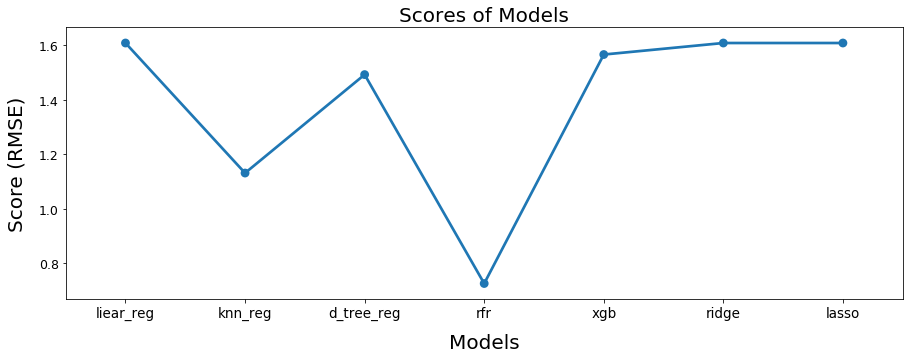

In [113]:
# Plot the model performance with the line plot

plt.figure(figsize = (15, 5))
sns.pointplot(x = ['liear_reg', 'knn_reg', 'd_tree_reg', 'rfr', 'xgb', 'ridge', 'lasso'], y = [1.608416, 1.131106, 1.492472, 0.725607, 1.566113, 1.608416, 1.608416], markers=['o'], linestyles=['-'])
plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Models', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

By depicted the line plot for the model perfotmance we can observe that RandomaForestRegressor model has given the best performance. Hence we will use the RandomForest model for the prediction on X_test dataset.

### Make Prediction

In [153]:
# making prediction on test dataset

predictions = rfr.predict(test)

In [171]:
# displaying predicted values

print(predictions)

[ 9.10865638  9.82463439  9.52527695 ...  9.35497945 10.09210402
  9.88766048]


In [172]:
# making dataframe of the predicted values

df = pd.DataFrame({'cc_cons_pred': predictions})

In [174]:
# Print first five rows of our predicted data values

df.head()

,cc_cons_pred
0,9.108656
1,9.824634
2,9.525277
3,9.207415
4,9.194248


In [177]:
# Save the prediction data in a file at the desire location

df.to_csv('C:/Users/admin/Desktop/data/Data Sets/Credit card cunsumption/pred_data.csv', index = False)

In [178]:
# Read the saved precticted file at the location 'C:/Users/admin/Desktop/data/Data Sets/Credit card cunsumption/pred_data.csv'

data = pd.read_csv('C:/Users/admin/Desktop/data/Data Sets/Credit card cunsumption/pred_data.csv')

In [180]:
# Print first five rows of our saved predicted file 

data.head()

,cc_cons_pred
0,9.108656
1,9.824634
2,9.525277
3,9.207415
4,9.194248


# --------------------------------------------Thank You-------------------------------------------------